# Demo:  Basic Data Manipulation

In this demo, you will see how to:
* Load data from a text file using the pandas library
* Create a scatter plot of data
* Handle missing data

After this, you should be able to be more fluent on pandas/python/scikit learn

## Loading the Data
We filrst load the modules.  The `pandas` module is for loading data and the `numpy` module is for performing mathematical calculations.

In [4]:
import pandas as pd
import numpy as np

The data for this demo comes from a survey of cars to determine the relation of mpg to engine characteristics.  The data can be found in the UCI library:
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg

You can directly read the data in the file, https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
We will load the data into ipython notebook, using the pandas library.  Unfortunately, the file header does not include the names of the fields, so we manually create a python list of the header names:

In [5]:
names = ['mpg', 'cylinders','displacement', 'horsepower', 
         'weight', 'acceleration', 'model year', 'origin', 'car name']

Next, we will read in the data.  The pandas has very good methods for loading data from ASCII tables. We will use the read_csv command.

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

This creates a pandas *dataframe*. We can see the first six lines of the dataframe with `head` command:

In [7]:
df.head(6)

,"18.0 8 307.0 130.0 3504. 12.0 70 1 ""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
5,14.0 8 454.0 220.0 4354. 9...


There were three errors:
* All the data appeared in one column.  That is, the columns were not "delimited" correctly
* The first line got mistook as a header
* The columns are missing their header names

These are common problems.  After some googling you can find out that you need to specify some other options to the `read_csv` command:

In [8]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

If you re-run `head` command now, you can see the loading was correct. You can see the column names, index, and values:

In [9]:
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


## Manipulating the Data
We can get the `shape` of the data, which indicates the number of samples and number of attributes

In [7]:
df.shape

(398, 9)

You can also see the three components of the `dataframe` object:

In [10]:
df.columns

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight',
       u'acceleration', u'model year', u'origin', u'car name'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [11]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ..., 
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

The `df.columns` attribute is not a python list, but a `pandas`-specific data structure called an *`Index`*.  To convert to a list, use the `tolist()` method:

In [12]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

You can select subsets of the attributes with indexing.  For example, this selects one attribute, which returns what is called a pandas `Series`

In [12]:
df2 = df['cylinders']
df2.head(6)

0    8
1    8
2    8
3    8
4    8
5    8
Name: cylinders, dtype: int64

You can also select a list of column names which returns another dataframe.

In [13]:
df2 = df[['cylinders','horsepower']]
df2.head(6)

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
5,8,198.0


# Plotting the Data
We load the `matplotlib` module to plot the data.  This module has excellent plotting routines that are very similar to those in MATLAB

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

First, we need to convert the dataframes to numpy arrays:

In [17]:
xstr = 'displacement'
x = np.array(df[xstr])
y = np.array(df['mpg'])

Then, we can create a scatter plot

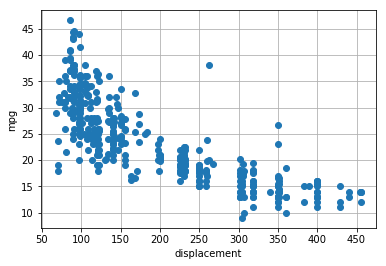

In [27]:
plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)

## Manipulating Numpy arrays

Once the data is converted to a numpy array, we can perform many useful simple calculations.  For example, we can compute the sample mean:

In [28]:
mx = np.mean(x)
my = np.mean(y)
print('Mean {0:s} = {1:5.1f}, mean mpg= {2:5.1f}'.format(xstr, mx, my))

Mean displacement = 193.4, mean mpg=  23.5


Fraction of cars with > 25 mpg:

In [29]:
np.mean(y > 25)

0.39698492462311558

Sample mean displacement for the cars that have mpg > 25

In [30]:
I = (y>25)
np.mean(x*I)/np.mean(I)

110.08227848101266

## Missing Data and NaN Values

Now, try a different field, horsepower

In [31]:
xstr = 'horsepower'
x = np.array(df[xstr])
y = np.array(df['mpg'])
np.mean(x)

nan

When you get the mean, it gives `nan` which means not a number.  The reason is that there was missing data in the orginal file and the `load_csv` function put `nan` values in the places where the data was missing.  This is very common.  To remove the rows with the missing data, we can use the `dropna` method:

In [32]:
df1 = df[['mpg','horsepower']]
df2 = df1.dropna()
df2.shape

(392, 2)

We can see that some of the rows have been dropped.  Specifically, the number of samples went from 396 to 392.  We can now compute the mean using the reduced dataframe.

In [33]:
x = np.array(df2['horsepower'])
y = np.array(df2['mpg'])
np.mean(x)

104.46938775510205

And, we can plot the data.

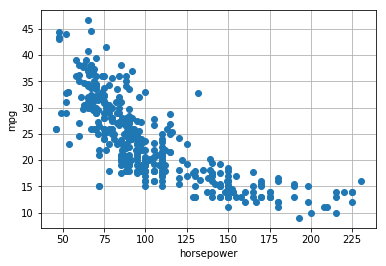

In [35]:
plt.plot(x,y,'o')
plt.xlabel(xstr)
plt.ylabel('mpg')
plt.grid(True)